# K-Nearest Neighbors (KNN)

## Overview
K-Nearest Neighbors is a **non-parametric, instance-based** (lazy) supervised learning algorithm used for both **classification** and **regression**. It makes predictions by looking at the **K closest data points** in the training set and aggregating their labels.

- **Classification** → majority vote among K neighbors
- **Regression** → average of K neighbors' values

It is called **lazy** because it does not learn an explicit model during training — it simply memorizes the training data and defers all computation to prediction time.

---

## How KNN Works (Step by Step)

1. Choose the number of neighbors **K**
2. For a new data point, calculate the **distance** to every training point
3. Select the **K nearest** training points
4. **Vote** (classification) or **average** (regression) their labels
5. Assign the result as the prediction

---

## Distance Metrics

The most common distance metrics used in KNN:

| Metric | Formula | Use Case |
|--------|---------|----------|
| **Euclidean** (default) | $d = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$ | Continuous features |
| **Manhattan** | $d = \sum_{i=1}^{n}\|x_i - y_i\|$ | Robust to outliers |
| **Minkowski** | $d = \left(\sum_{i=1}^{n}\|x_i - y_i\|^p\right)^{1/p}$ | Generalization ($p=2$ → Euclidean, $p=1$ → Manhattan) |
| **Hamming** | Fraction of differing positions | Categorical features |

> **Important:** Since KNN is distance-based, **feature scaling is mandatory**. Features on different scales will dominate the distance calculation.

---

## Effect of K

| K Value | Bias | Variance | Decision Boundary | Risk |
|---------|------|----------|-------------------|------|
| Small (K=1) | Low | High | Very complex, jagged | Overfitting |
| Moderate (optimal) | Balanced | Balanced | Smooth, generalized | Best performance |
| Large (K=n) | High | Low | Very smooth / flat | Underfitting |

- **K too small** → model memorizes noise (overfitting)
- **K too large** → model ignores local patterns (underfitting)
- **Rule of thumb** for starting point: $K \approx \sqrt{n}$ where $n$ = number of training samples, preferably **odd** to avoid ties

---

## Choosing the Best K

### 1. Heuristic
Start with $K = \sqrt{n_{train}}$, prefer odd values to avoid ties in binary classification.

### 2. Cross-Validation (Recommended)
Loop over candidate K values, evaluate each with k-fold cross-validation on training data only, and pick the K with the best average validation score.

---

## Key Properties

- **No training phase** — the entire training set is stored in memory
- **Prediction is slow** — $O(n \cdot d)$ per query (n = samples, d = features)
- **Non-linear decision boundaries** — KNN can model complex class boundaries
- **Sensitive to irrelevant features** — noisy features distort distances
- **Sensitive to scale** — always apply `StandardScaler` or `MinMaxScaler` before KNN

---

## Syntax (Scikit-learn)

```python
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=5,       # K — number of neighbors
    metric='euclidean',  # distance metric
    weights='uniform'    # 'uniform' = equal vote, 'distance' = closer neighbors vote more
)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
```

---

## When to Use KNN

| Condition | Use KNN? |
|-----------|---------|
| Small to medium dataset | Yes |
| Non-linear decision boundary needed | Yes |
| Large dataset (millions of rows) | No (too slow) |
| High-dimensional data (many features) | No (curse of dimensionality) |
| Need fast predictions at inference | No |
| Features are on similar scales | Yes |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the breast cancer wisconsin dataset
df = pd.read_csv('../Datasets/breast-cancer-wisconsin.csv')
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
487,913505,M,19.44,18.82,128.10,1167.0,0.10890,0.14480,0.22560,0.11940,...,30.39,153.90,1740.0,0.1514,0.3725,0.59360,0.20600,0.3266,0.09009,NaN
551,923780,B,11.13,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,...,28.26,77.80,436.6,0.1087,0.1782,0.15640,0.06413,0.3169,0.08032,NaN
526,91813701,B,13.46,18.75,87.44,551.1,0.10750,0.11380,0.04201,0.03152,...,25.16,101.90,719.8,0.1624,0.3124,0.26540,0.14270,0.3518,0.08665,NaN
344,89864002,B,11.71,15.45,75.03,420.3,0.11500,0.07281,0.04006,0.03250,...,18.16,84.16,516.4,0.1460,0.1115,0.10870,0.07864,0.2765,0.07806,NaN
452,9111843,B,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,...,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,NaN
461,911296202,M,27.42,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,...,31.37,251.20,4254.0,0.1357,0.4256,0.68330,0.26250,0.2641,0.07427,NaN
200,877501,B,12.23,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,...,28.36,92.15,638.4,0.1429,0.2042,0.13770,0.10800,0.2668,0.08174,NaN
113,864292,B,10.51,20.19,68.64,334.2,0.11220,0.13030,0.06476,0.03068,...,22.75,72.62,374.4,0.1300,0.2049,0.12950,0.06136,0.2383,0.09026,NaN
39,855138,M,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,...,26.02,107.30,740.4,0.1610,0.4225,0.50300,0.22580,0.2807,0.10710,NaN
326,89524,B,14.11,12.88,90.03,616.5,0.09309,0.05306,0.01765,0.02733,...,18.00,98.40,749.9,0.1281,0.1109,0.05307,0.05890,0.2100,0.07083,NaN


In [8]:
# lets just remove id and Unnamed: 32

df.drop(columns= ['id', 'Unnamed: 32',] , inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='diagnosis'), df['diagnosis'], test_size=0.2, random_state=42)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [11]:
# now lets scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
x_train

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]], shape=(455, 30))

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [14]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(x_test)

accuracy_score(y_test, y_pred)

0.9473684210526315

### How to select K in KNN?

we have two main approaches to select K in KNN:

**1. Heuristic approach :** (Not the best approach but a good starting point)

we can use the square root of the number of samples in the training set as a starting point for K. For example, if we have 100 samples in the training set, we can start with K=10 (`we generally want K to be an odd number to avoid ties in classification`).

**2. Cross-validation approach :** (Best approach)

we can use cross-validation to evaluate the performance of KNN for different values of K and select the one that gives the best performance. This involves splitting the training data into multiple folds, training the KNN model on each fold, and evaluating its performance on the remaining fold. We can repeat this process for different values of K and select the one that gives the highest average accuracy across all folds.

Text(0.5, 1.0, 'KNN Accuracy for different K values')

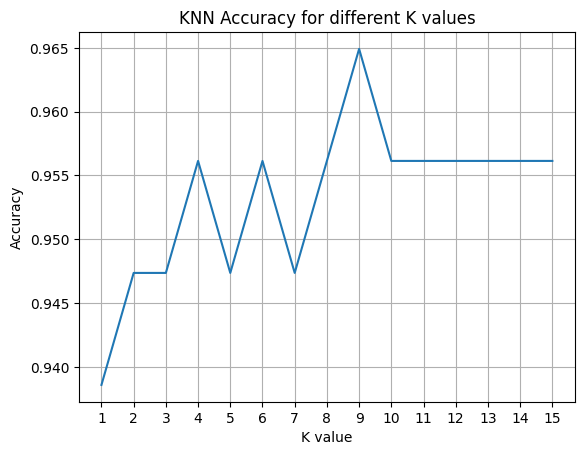

In [22]:
# Brute force method to find the best k value

scores = []

for i in range(1,16):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(x_train,y_train)
    
    y_pred = knn.predict(x_test)

    scores.append(accuracy_score(y_test, y_pred))

# lets plot the scores

plt.plot(range(1,16),scores)
plt.xticks(range(1,16))
plt.grid()
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different K values')

**Observation:**

From the plot, we can see that the accuracy is highest when K=9. This suggests that K=9 is a good choice for our KNN model.

Text(0.5, 1.0, 'KNN Cross Validation Accuracy for different K values')

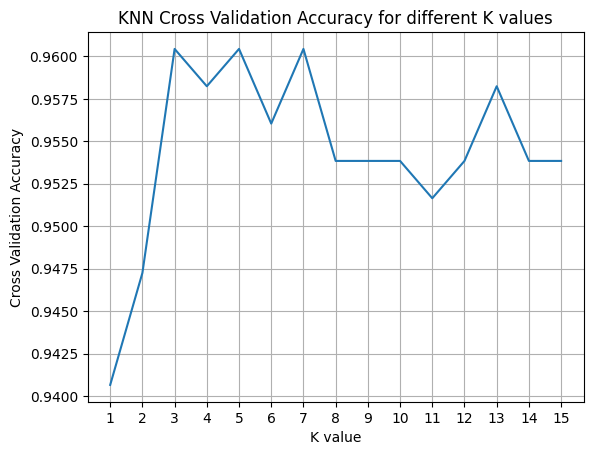

In [21]:
# using cross validation to find the best k value

from sklearn.model_selection import cross_val_score
cross_val_scores = []
for i in range(1,16):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    
    cross_val_scores.append(scores.mean())

plt.plot(range(1,16),cross_val_scores)
plt.xticks(range(1,16))
plt.grid()
plt.xlabel('K value')
plt.ylabel('Cross Validation Accuracy')
plt.title('KNN Cross Validation Accuracy for different K values')
s

**Observation from Cross-Validation:**

From the cross-validation plot, we can see that **K=3, K=5, and K=7** all achieve the same highest accuracy (0.9604). When multiple K values give the same optimal performance, we select the **smallest K** to maintain model simplicity and avoid overfitting.

**Therefore, K=3 is our optimal choice** for the final KNN model.

#### Why Different K Values?

**Method 1 (Test Set):** K=9 - **Data leakage** (hyperparameter tuning on test set)  
**Method 2 (Cross-Validation):** K= 3,5,7    - **Correct** (uses only training data)

#### Decision Surface

The decision surface is a visual representation of how the KNN model classifies different regions of the feature space. It shows the boundaries where the predicted class changes based on the nearest neighbors. By plotting the decision surface, we can see how well the KNN model separates the classes and understand its behavior in different regions of the feature space.

**Implementation**

Using mlxtend (Recommended)

Original labels (first 10): ['B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M']
Data type: <class 'str'>
Converted labels (first 10): [0 1 0 0 0 1 0 0 0 1]
Data type: <class 'numpy.int64'>
Unique values: [0 1]

Label mapping:
'B' (Benign) → 0
'M' (Malignant) → 1

2D feature shape: (455, 2)


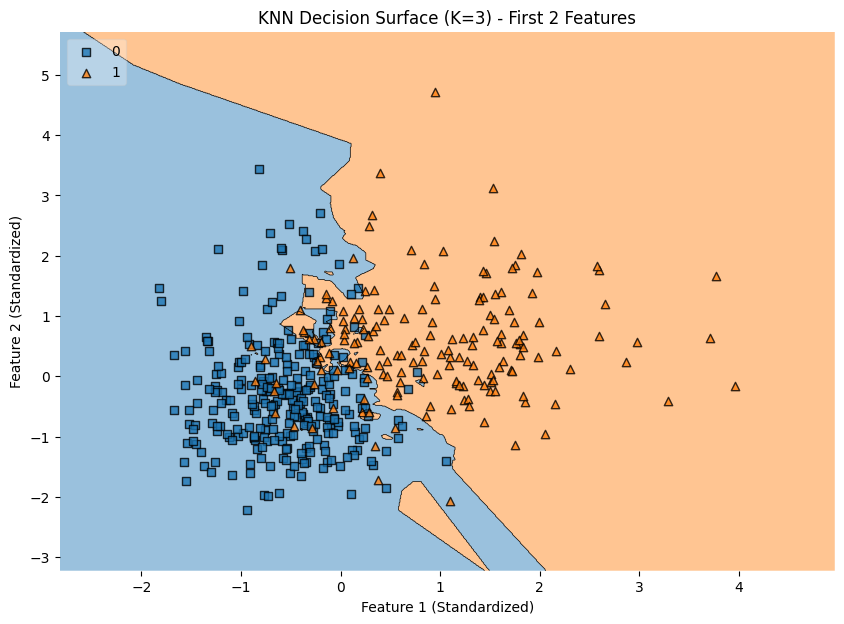


Classes: 0=Benign, 1=Malignant
Decision boundary shows regions where KNN predicts each class


In [39]:
# Import required libraries for decision surface
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder
import numpy as np

# =============================================
# MANUAL LABEL ENCODING - Step by Step
# =============================================

# Problem: y_train contains strings ['B', 'M'] but mlxtend needs integers [0, 1]
print("Original labels (first 10):", y_train[:10].values)
print("Data type:", type(y_train.iloc[0]))

# Solution: Convert strings to integers using np.where()
# np.where(condition, value_if_true, value_if_false)
#   - condition: y_train == 'B' → checks each element: is it 'B'?
#   - value_if_true: 0 → if 'B', assign 0 (Benign)
#   - value_if_false: 1 → if not 'B' (i.e., 'M'), assign 1 (Malignant)

y_binary = np.where(y_train == 'B', 0, 1)

print("Converted labels (first 10):", y_binary[:10])
print("Data type:", type(y_binary[0]))
print("Unique values:", np.unique(y_binary))

# Verification: Show the mapping
print("\nLabel mapping:")
print("'B' (Benign) → 0")
print("'M' (Malignant) → 1")

# Use first 2 features for 2D visualization
X_2d = x_train[:, :2]
print(f"\n2D feature shape: {X_2d.shape}")

# Train KNN with optimal K=3 on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_2d, y_binary)

# Plot decision surface
plt.figure(figsize=(10, 7))
plot_decision_regions(X_2d, y_binary, clf=knn_2d, legend=2)
plt.title('KNN Decision Surface (K=3) - First 2 Features')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

print(f"\nClasses: 0=Benign, 1=Malignant")
print(f"Decision boundary shows regions where KNN predicts each class")

---

## Bias-Variance Tradeoff in KNN

### **Overfitting (Low K Values)**
- **K=1**: Creates highly complex, jagged decision boundaries
- **High Variance**: Model is sensitive to minor changes in training data
- **Memorization**: Algorithm remembers specific training points rather than learning general patterns
- **Result**: Excellent training performance but poor generalization to new data

### **Underfitting (High K Values)**
- **Large K (e.g., K=n/2)**: Creates overly simplistic decision boundaries
- **High Bias**: Model fails to capture underlying data complexity
- **Uniform Classification**: When K approaches training set size (n=200), entire regions become single-colored, ignoring local patterns
- **Result**: Poor performance on both training and test datasets

### **Decision Boundary Evolution**
```
K=1        →  Highly Complex Boundaries    →  Overfitting
K=Optimal  →  Moderately Complex Boundaries →  Best Performance  
K=Large    →  Overly Simple Boundaries     →  Underfitting
```

In [2]:
# Visualize how decision boundaries change with different K values

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, fixed

def load_data():
    cancer = datasets.load_breast_cancer()
    return cancer

def plot_decision_boundaries(n_neighbors, data, labels):
    h = .02
    cmap_light = ListedColormap(['orange', 'blue'])
    cmap_bold = ListedColormap(['darkorange', 'darkblue'])

    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(data, labels)

    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'2-Class classification (k = {n_neighbors})')
    plt.show()

cancer = load_data()

# Use only the first two features and standardize them.
X = StandardScaler().fit_transform(cancer.data[:, :2])
y = cancer.target

# Interactive widget
interact(plot_decision_boundaries, n_neighbors=(1, 20), data=fixed(X), labels=fixed(y));

interactive(children=(IntSlider(value=10, description='n_neighbors', max=20, min=1), Output()), _dom_classes=(…

---

## Key Understandings

**1. KNN is lazy — no training phase**
KNN stores all training data and does all the work at prediction time. There's no learned model — just distance computation to the stored examples. This makes training instant but prediction slow.

**2. K controls the bias-variance tradeoff**
- Small K → low bias, high variance → complex boundary → overfitting
- Large K → high bias, low variance → smooth boundary → underfitting
- Find the sweet spot using **cross-validation**, not the test set

**3. Feature scaling is non-negotiable**
KNN measures raw distances. A feature ranging `0–10000` will completely dominate one ranging `0–1`. Always apply `StandardScaler` or `MinMaxScaler` before fitting.

**4. Curse of Dimensionality**
As the number of features grows, all points become roughly equidistant from each other — the concept of "nearest neighbor" breaks down. KNN degrades significantly in high-dimensional spaces.

**5. Choice of distance metric matters**
Euclidean distance works well for continuous, normally distributed features. Manhattan is more robust to outliers. For mixed or categorical data, consider Hamming or custom metrics.

**6. Imbalanced classes can skew results**
If one class has far more samples, it will dominate the neighborhood vote. Use `weights='distance'` or balance the dataset before applying KNN.

**7. Computational cost at prediction**
Every prediction requires computing distances to all $n$ training points across all $d$ features — $O(n \cdot d)$. For large datasets, use approximate methods like **KD-trees** or **Ball trees** (scikit-learn uses these automatically via `algorithm='auto'`).

**8. Decision boundary is non-linear**
Unlike logistic regression (linear boundary), KNN can capture arbitrarily complex boundaries — making it powerful for datasets where classes aren't linearly separable.

**9. Not Robust to Outliers**
Outliers can drastically affect the nearest neighbors and thus the prediction. Consider using robust distance metrics or preprocessing to handle outliers before applying KNN.

**10. Can't be used for Inference**
KNN is a non-parametric, instance-based algorithm that does not learn an explicit model. It cannot be used for inference in the traditional sense (e.g., extracting feature importance, understanding relationships between features and target) — it simply relies on the stored training data and distance calculations at prediction time.